<a href="https://colab.research.google.com/github/rpasquini/metodos_cuantitativos/blob/main/notebooks/python/final_2025_consigna_general.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final: Metodos Cuantitativos Aplicados a Estudios Urbanos

Profesor Ricardo Pasquini \
Universidad Torcuato Di Tella \
[rpasquini@utdt.edu](rpasquini@utdt.edu)

En este trabajo final vamos a analizar determinantes del valor de los terrenos en CABA. En particular, el foco va a ser  analizar cuestiones relacionadas a la regulación constructiva, con implicancias en el diseño de regulaciones. Se espera que ustedes alcancen un mejor entendimiento de la implementación de modelos de regresión para el caso del análisis del efecto de las normativas de construcción.

Los datos de precios de lotes corresponden al año 2020 y fueron compilados del sitio [Buenos Aires Data](https://data.buenosaires.gob.ar/). Si bien utilizarán esta base de datos para los fines del trabajo final, no deben utilizar estos datos para investigación, ya que el procedimiento que se utilizó para combinar los datos debe revisarse y podría presentar errores o inconsistencias.   


**Importante:**

* El trabajo se realiza de manera individual.
* Las preguntas de la consigna se encuentran en el Campus UTDT (Ver consigna general). Deben responder allí las preguntas.
* Se le pedirá que entregue una copia de los cálculos. Para ellos:
1.  Guarde una copia local (en su Google Drive) y agregue celdas de código y texto al notebook.
2. Al finalizar,  hacer click en compartir "share" para obtener el link a la copia del notebook.
3. Incluir el link en el examen final.
4. Recuerden otorgar permisos de edición a rpasquini@utdt.edu.


In [1]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 57.6 MB/s eta 0:00:00


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import contextily as cx
import statsmodels.formula.api as smf


In [3]:
#Levantando los datos a un geodataframe
gdf=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/metodos_cuantitativos/raw/main/data/terrenos_2020_cregu_parcelas.zip")

# Un primer vistazo de los datos
Utilice el siguiente código para mapear sus datos (no es necesario hacer cambios en el código)

(np.float64(-58.53670159774736),
 np.float64(-58.34606270294005),
 np.float64(-34.70218399294072),
 np.float64(-34.53226919386873))

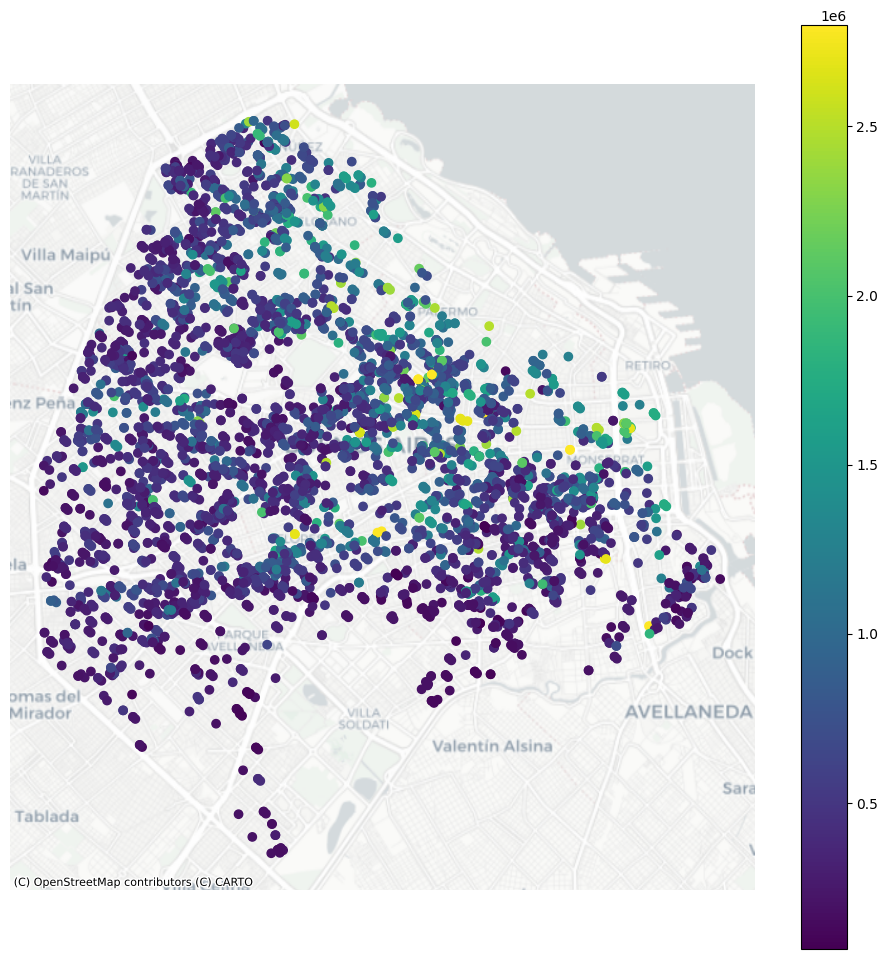

In [4]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf.to_crs("EPSG:4326").plot(ax=ax,column='PRECIOUSD', legend=True)
#ax.set_xlim(-59.2, -58)
#ax.set_ylim(-35, -34.1)
cx.add_basemap(ax, crs=gdf.to_crs(epsg=4326).crs.to_string(), source=cx.providers.CartoDB.Positron)
ax.axis('off')
#plt.title(ciudad)

### Descripcion de campos
| campo      | tipo    | descripcion                                                                                                                                                                                             |
| ---------- | ------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| SUPERFICIE       | int  | Superficie en m2     
| PRECIOUSD | int  | Precio terreno en USD
| COTIZACION |	int | Cotizacion del USD en pesos
| TRIMESTRE | string | Trimestre
| BARRIO	 | string | Barrio
| COMUNA | int | Nro de Comuna
| smp1       | string  | Corresponde al número de identificación de la Sección-Manzana-Parcela                                                                                                                                   |
| sm         | string  | Corresponde al número de identificación de la Sección-Manzana              |
| uni_edif_1 | number  | Unidad de edificabilidad 1: define la altura máxima aplicable a cada Unidad de la Ciudad de Buenos Aires
| plusvalia | number  | Estimación de la plusvalia que debería pagar el desarrollador si aprovechase la máxima capacidad constructiva